## Model 1: Multinomial Naive Bayes

#### Imports

In [14]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix


#### Bag of Words Implementation

In [15]:
# code here
# BagOfWords class, taken from PA 1.1
class BagOfWords:
    def __init__(self):
        self.vocabulary = {}
    
    def fit(self, documents):
        # documents : array of strings
        unique_words = set()
        for doc in documents:                   # for each string
            unique_words.update(doc.split())    # add all words to set

        self.vocabulary = {word: idx for idx, word in enumerate(unique_words)}
    
    def vectorize(self, sentence):  # convert sentence into vector
        
        vector = np.zeros(len(self.vocabulary), dtype=int)

        for word in sentence.split():
            if word in self.vocabulary:
                vector[self.vocabulary[word]] += 1
        return vector
    
    def transform(self, documents):
        # use vectorize on each row of the data
        return np.array([self.vectorize(doc) for doc in documents])



bow = BagOfWords()


print(" !Sanity test! \n")
st = ['I dont like ML', 'I also dont like CV']
print(st)
bow.fit(st)
print(bow.vocabulary)
bow.transform([
    'like also CV I ML dont',
    '',
    'I  like CV CV CV ML ML'
])



 !Sanity test! 

['I dont like ML', 'I also dont like CV']
{'ML': 0, 'like': 1, 'also': 2, 'I': 3, 'dont': 4, 'CV': 5}


array([[1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 3]])

#### Test - Train Split

In [16]:

df_cleaned = pd.read_csv(r"cleaned.csv")
df_inputs = df_cleaned.drop(columns=["Gold Labels"])
df_outputs = df_cleaned["Gold Labels"]

# Split the dataset into training and test sets with test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
df_inputs.head()

(784, 4)
(337, 4)


,Article IDs,Titles,Links,Contents
0,0,سدھو موسے والا کے والدین نے اپنے چھوٹے بیٹے کا...,https://urdu.geo.tv/latest/386103-,بھارت پنجاب سے تعلق رکھنے معروف آنجہانی گلوکا...
1,1,گانے میں لارنس بشنوئی کا نام، گینگسٹر کا ایک ب...,https://urdu.geo.tv/latest/386086-,بھارت بدنام زمانہ گینگ لارنس بشنوئی نے بار بال...
2,2,وہ کریں جو آپ کی بیگم کہتی ہے: فلک شبیر کا شو...,https://urdu.geo.tv/latest/386083-,اداکارہ سارہ خان شوہر گلوکار فلک شبیر نے شوہرو...
3,3,سلمان کے بعد شاہ رخ خان کو بھی جان سے مارنےکی ...,https://urdu.geo.tv/latest/385991-,ممبئی بالی وڈ اداکار سلمان خان بعد اب کنگ خان ...
4,4,برطانوی پارلیمنٹ نے ماہرہ خان کو لائف ٹائم اچی...,https://urdu.geo.tv/latest/385956-,برطانیہ پارلیمنٹ نے اداکارہ ماہرہ خان کو فنی خ...


#### Converting into Bag of Words

In [17]:
bag = BagOfWords()
bag.fit(X_train["Contents"])
X_train_vectors = bag.transform(X_train['Contents'])
X_test_vectors = bag.transform(X_test['Contents'])

print(len(bag.vocabulary))
bag.vocabulary

11116


{'بنانی': 0,
 'آسٹریلیا،': 1,
 'پڑھیںکیا': 2,
 'وضو': 3,
 'پیپلز': 4,
 'صوکار': 5,
 'گولف': 6,
 'دھاتوں': 7,
 'روح': 8,
 'پندرہ': 9,
 'ہیں،': 10,
 'یہاں': 11,
 'انسٹی': 12,
 'اعزاز': 13,
 'مدتی': 14,
 'مراسلہ': 15,
 'بےحد': 16,
 'پڑگیا۔': 17,
 'پھیلائے': 18,
 'پشین،': 19,
 'ڈالرز': 20,
 'خمیازہ': 21,
 'سائنسی': 22,
 'تیسرا': 23,
 'نوعیت': 24,
 'کاغذات': 25,
 'اسکرین': 26,
 'ترلائی': 27,
 'زکر': 28,
 'مسٹر': 29,
 'مرتے': 30,
 'ازدواجی': 31,
 'پروٹین': 32,
 'ہنگاموں': 33,
 'عربیا': 34,
 'فرانک': 35,
 'آگہی': 36,
 'رہنما': 37,
 'کاوشوں': 38,
 'جا': 39,
 'بُخار': 40,
 'کریٹس': 41,
 'بڈرز': 42,
 'وعدہ': 43,
 'گردانہ': 44,
 'آسٹریلین': 45,
 'مطالعہ': 46,
 'کہاوت': 47,
 'فیگرز': 48,
 'کاپی': 49,
 'وائلٹ': 50,
 'ڈانس،': 51,
 'نٹ': 52,
 'میٹا': 53,
 'انجینئرنگ': 54,
 'ایکسپریس': 55,
 'ریفنسپرگر': 56,
 'پاسپورٹ': 57,
 'عروج': 58,
 'فنکار': 59,
 'لمبے': 60,
 'بیکٹیریا': 61,
 'پیسے': 62,
 'نائف': 63,
 'کامران': 64,
 'گیٹس': 65,
 'کیلکولیٹر': 66,
 'ووٹر': 67,
 'متبادل': 68,
 'پلیٹو،': 69,
 'اسٹین

## Naive Bayes Classifier 
- `NaiveBayes` class implemented
- Highly inspired by PA 1.1

In [18]:
# NaiveBayes classifier, again taken from assignment 1.1

class NaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.word_given_class_probabilities = {}
        self.classes = []
        self.vocabulary_size = 0

    def fit(self, X, y):
        total_samples = len(y)       # to find priors, get total count of labels/emotions and how many of each class are there
        self.classes = np.unique(y)
        class_counts = {cls: 0 for cls in self.classes}
        
        word_counts = {cls: np.zeros(len(X[0])) for cls in self.classes} # count words for each class
        
        for i in range(total_samples):
            cls = y[i]
            class_counts[cls] += 1
            word_counts[cls] += X[i]

        # P(c) nikalo, fairly staightforwad we got da count for each calss aboove and the total samples 
        self.class_probabilities = {cls: count / total_samples for cls, count in class_counts.items()}

        # P(x_i | c) nikalo, yeh thora tricky hai, again made a dict like in part bernoulli boi, summed up the total number, then for each count of word (+1 for laplace smoothing) for each class, divide it by total words in that class (and ofcurse by |V|)
        self.word_given_class_probabilities = {}
        for cls in self.classes:
            total_words_in_class = word_counts[cls].sum()
            self.word_given_class_probabilities[cls] = (word_counts[cls] + 1) / (total_words_in_class + len(X[0]))  # Laplace smoothing

    def predict(self, X):
        predictions = []
        
        for x in X:
            log_probs = {}
            
            for cls in self.classes:
                log_prob = np.log(self.class_probabilities[cls])  #log P(c)
                log_prob += np.sum(np.log(self.word_given_class_probabilities[cls]) * x)  #log P(x|c)
                log_probs[cls] = log_prob

            # pick class with the maximum log probability
            predicted_class = max(log_probs, key=log_probs.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)


## Evaluation Metrics

In [21]:
# For evaluation, taken from 1.2

def accuracy_own(predicted_labels, true_labels): 
  return np.mean(predicted_labels == true_labels)


def make_confusion_matrix_own(predicted_labels, true_labels): 
  num_classes = len(np.unique(true_labels))
  confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
  for true, predicted in zip(true_labels, predicted_labels):
      confusion_matrix[true][predicted] += 1
  
  return confusion_matrix


def make_heat_map(confusion_matrix, title):
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
  plt.title(title)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()


def precision_own(confusion_matrix, class_label):
  tp = confusion_matrix[class_label, class_label]
  fp = np.sum(confusion_matrix[:, class_label]) - tp
  
  if (tp + fp) == 0:
      return 0
  else:
      return tp / (tp + fp)

def recall_own(confusion_matrix, class_label):
  tp = confusion_matrix[class_label, class_label]
  fn = np.sum(confusion_matrix[class_label, :]) - tp
  
  if (tp + fn) == 0:
      return 0
  else:
      return tp / (tp + fn)

def f1_score_own(precision, recall):
  if (np.all(precision == 0) and np.all(recall == 0)):
      return 0
  else:
      return 2 * (precision * recall) / (precision + recall)


def macro_average_f1_own(confusion_matrix):
  num_classes = confusion_matrix.shape[0]
  f1_scores = []
  
  for class_label in range(num_classes):
      precision_value = precision_own(confusion_matrix, class_label)
      recall_value = recall_own(confusion_matrix, class_label)
      f1 = f1_score_own(precision_value, recall_value)
      f1_scores.append(f1)
  
  return np.mean(f1_scores)


def evaluate(predicted_labels, true_labels):
  accuracy_score = accuracy_own(predicted_labels, true_labels)
  confusion_matrix = make_confusion_matrix_own(predicted_labels, true_labels)
  macro_f1 = macro_average_f1_own(confusion_matrix)
  
  # Display my nicely formatted report
  print(f"Accuracy: {accuracy_score:.4f}") # .4f rounds it up to 4 decimal places
  print(f"Macro-Average F1 Score: {macro_f1:.4f}")
  print("\nConfusion Matrix:")
  make_heat_map(confusion_matrix, title="Confusion Matrix Heatmap")
  
  return accuracy_score, macro_f1, confusion_matrix

## Using our model to fit, predict and evaluate the data.

Label Mapping: {'business': 0, 'entertainment': 1, 'science-technology': 2, 'sports': 3, 'world': 4}
Accuracy: 0.9644
Macro-Average F1 Score: 0.9654

Confusion Matrix:


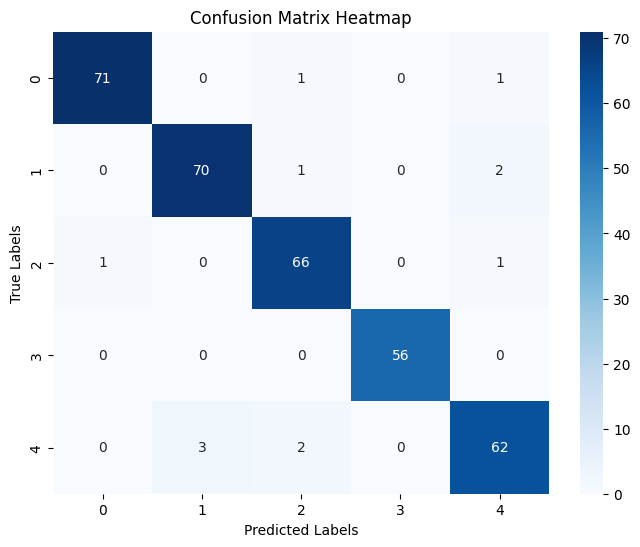

In [20]:
# instantiate, fit, predict

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

nb_classifier = NaiveBayes()
nb_classifier.fit(X_train_vectors, y_train)
test_predictions = nb_classifier.predict(X_test_vectors)

# Evaluation pre-processing

# my evaluate function constructs a confusion matrix using y_train values as indices, since here they are strings, first i gotta convert them to integers
unique_classes = np.unique(np.concatenate((y_test, test_predictions))) 
label_mapping = {label: idx for idx, label in enumerate(unique_classes)}
y_test_encoded = np.array([label_mapping[label] for label in y_test])
test_predictions_encoded = np.array([label_mapping[label] for label in test_predictions])
print("Label Mapping:", label_mapping)

# Evaluate
accuracy, macro_f1, conf_matrix = evaluate(test_predictions_encoded, y_test_encoded)
